In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [2]:
import os

In [3]:
!ls
!pwd

aiskeye_retinanet.ipynb  aiskyeye_dataset  examples.desktop
/home/user1


In [4]:
!cd aiskyeye_dataset/

In [5]:
%cd aiskyeye_dataset/


/home/user1/aiskyeye_dataset


In [6]:
!cd 

In [7]:
base_dir = '/home/user1/aiskyeye_dataset/'
train_base_dir = os.path.join(base_dir, 'VisDrone2019-DET-train')
train_images = os.path.join(train_base_dir, 'images')
train_annotations = os.path.join(train_base_dir, 'annotations')
val_base_dir = os.path.join(base_dir, 'VisDrone2019-DET-val')
val_images = os.path.join(val_base_dir, 'images')
val_annotations = os.path.join(val_base_dir, 'annotations')
test_dir = os.path.join(base_dir, 'VisDrone2019-DET-test-challenge')
test_images = os.path.join(test_dir, 'images')

In [8]:
train_annotations_list = os.listdir(train_annotations)
val_annotations_list = os.listdir(val_annotations)
train_images_list = os.listdir(train_images)
val_images_list = os.listdir(val_images)
test_images_list = os.listdir(test_images)

train_annotations_list[:5]

['9999953_00000_d_0000019.txt',
 '9999998_00282_d_0000235.txt',
 '9999956_00000_d_0000113.txt',
 '9999942_00000_d_0000226.txt',
 '9999966_00000_d_0000091.txt']

In [9]:
num_train_images = len(train_images_list)
num_val_images = len(val_images_list)
num_test_images = len(test_images_list)

In [10]:
print(f"No. of train images: {num_train_images}")
print(f"No. of test images: {num_test_images}")
print(f"No. of val images: {num_val_images}")

No. of train images: 6471
No. of test images: 1580
No. of val images: 548


In [11]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

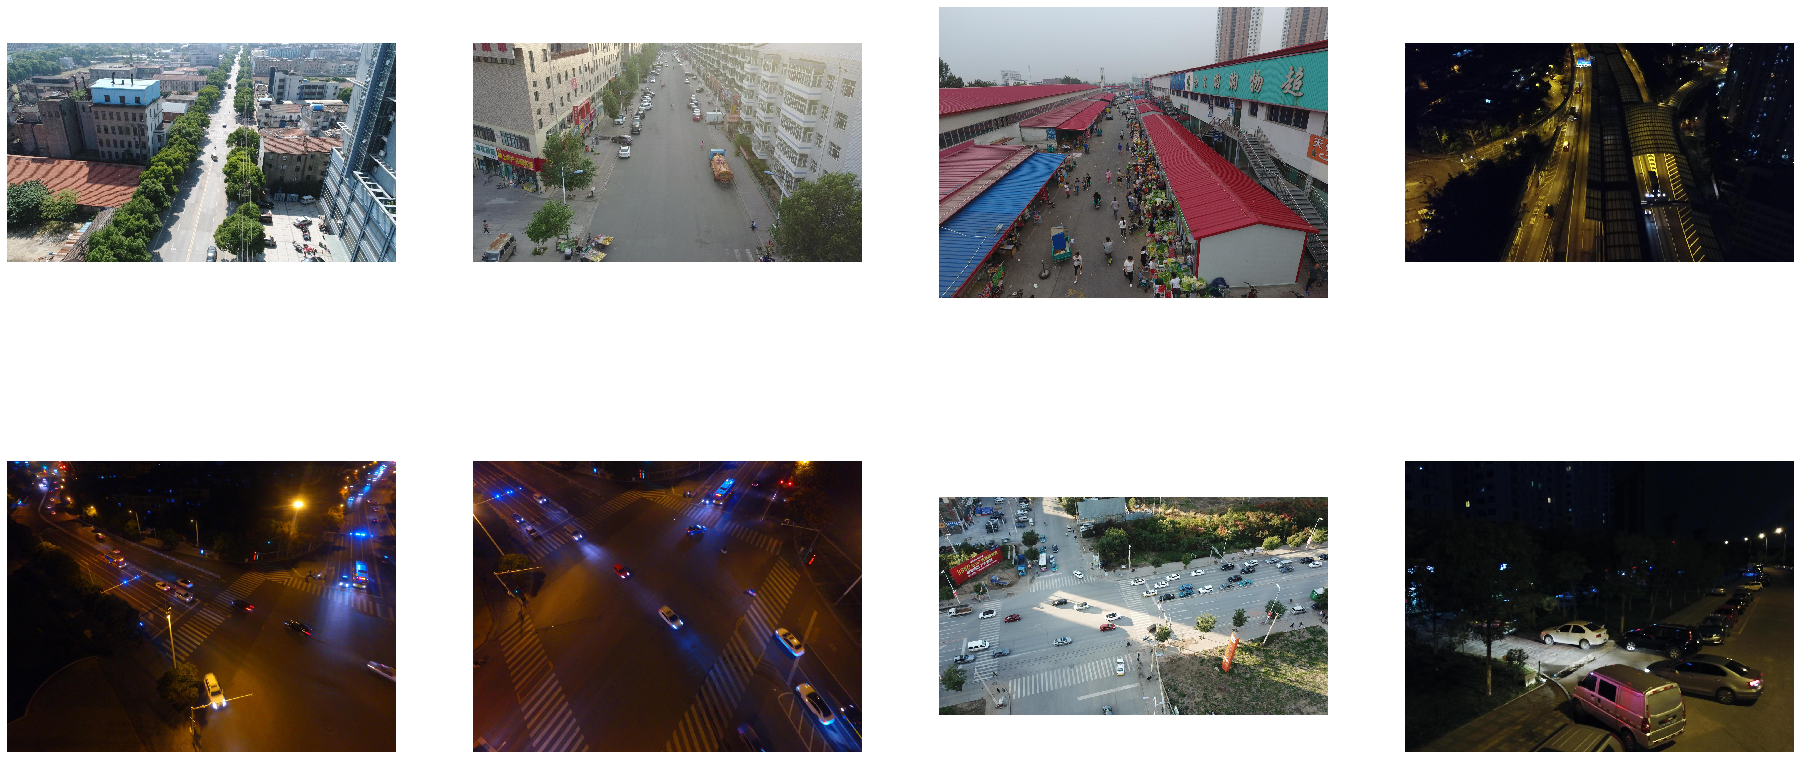

In [15]:
fig = plt.gcf()
fig.set_size_inches(ncols * 8, nrows * 8)

pic_index += 8

next_pic = [os.path.join(train_images, fname)
                for fname in train_images_list[pic_index-8:pic_index]
           ]
for i, img_path in enumerate(next_pic):
    
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()